# S09 T01: Practicant amb training i test sets

Descripció:

Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

## NIVELL 1


### Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.



In [1]:
# Crido a les llibreries necessàries
# Faig entrar l'arxiu CSV gràcies a pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

delayedFlightsAmbNaN = pd.read_csv(r'C:\Users\Anna\DataScience\SPRINTS\SPRINT 3\Sprint 3 T01\DelayedFlights\DelayedFlights.csv')


# Elimino els NaN per fer el dataset algo més petit
delayedFlights = delayedFlightsAmbNaN.dropna()

display(delayedFlights)


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,7009705,2008,12,13,6,921.0,830,1112.0,1008,DL,...,8.0,21.0,0,N,0,51.0,0.0,13.0,0.0,0.0
1936752,7009709,2008,12,13,6,1552.0,1520,1735.0,1718,DL,...,9.0,7.0,0,N,0,0.0,0.0,0.0,0.0,17.0
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0


In [2]:
delayedFlights.count()

Unnamed: 0           1247486
Year                 1247486
Month                1247486
DayofMonth           1247486
DayOfWeek            1247486
DepTime              1247486
CRSDepTime           1247486
ArrTime              1247486
CRSArrTime           1247486
UniqueCarrier        1247486
FlightNum            1247486
TailNum              1247486
ActualElapsedTime    1247486
CRSElapsedTime       1247486
AirTime              1247486
ArrDelay             1247486
DepDelay             1247486
Origin               1247486
Dest                 1247486
Distance             1247486
TaxiIn               1247486
TaxiOut              1247486
Cancelled            1247486
CancellationCode     1247486
Diverted             1247486
CarrierDelay         1247486
WeatherDelay         1247486
NASDelay             1247486
SecurityDelay        1247486
LateAircraftDelay    1247486
dtype: int64

In [3]:
delayedFlights.shape

(1247486, 30)

In [4]:
delayedFlights.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.247486e+06,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,...,1.247486e+06,1.247486e+06,1.247486e+06,1247486.0,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06
mean,3.319515e+06,2008.0,6.065399e+00,1.572542e+01,3.980082e+00,1.558832e+03,1.487949e+03,1.616749e+03,1.652458e+03,2.276526e+03,...,7.415867e+02,7.297232e+00,2.066033e+01,0.0,0.0,1.917943e+01,3.703355e+00,1.502162e+01,9.013728e-02,2.529649e+01
std,2.079531e+06,0.0,3.508937e+00,8.793008e+00,1.993270e+00,4.543300e+02,4.211782e+02,5.839416e+02,4.617372e+02,1.997547e+03,...,5.593643e+02,6.033239e+00,1.667983e+01,0.0,0.0,4.354624e+01,2.149153e+01,3.383308e+01,2.022716e+00,4.205489e+01
min,4.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.484624e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.232000e+03,1.150000e+03,1.326000e+03,1.340000e+03,6.370000e+02,...,3.340000e+02,4.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.224052e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.618000e+03,1.529000e+03,1.737000e+03,1.722000e+03,1.589000e+03,...,5.950000e+02,6.000000e+00,1.600000e+01,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.921396e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.924000e+03,1.830000e+03,2.048000e+03,2.022000e+03,3.676000e+03,...,9.720000e+02,8.000000e+00,2.400000e+01,0.0,0.0,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009718e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [5]:
delayedFlights.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [6]:
# Em quedo només amb alguns atributs numèrics per empetitir una mica el dataset i que no em vagi tant lent l'ordinador
numerics = delayedFlights.iloc[:,[5,7,15,16]]
numerics.head()

,DepTime,ArrTime,ArrDelay,DepDelay
3,1829.0,1959.0,34.0,34.0
5,1937.0,2037.0,57.0,67.0
7,1644.0,1845.0,80.0,94.0
9,1452.0,1640.0,15.0,27.0
11,1323.0,1526.0,16.0,28.0


Després de fer una mica de resum del dataset, comencem a fer l'exercici i dividim les dades en train i test.

In [7]:
# Importem la llibreria necessària
from sklearn.model_selection import train_test_split

# dividim el conjunt de dades original en columnes d'entrada (X) i de sortida (y)

X = numerics.iloc[:, [0,1]]
y= numerics.iloc[:, [2,3]]
print(X.shape)
print(y.shape)

# cridem a la funció passant ambdues matrius i les dividim adequadament en subconjunts de train i test. Especifiquem que volem la divisió de 67% train i 33% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


(1247486, 2)
(1247486, 2)


In [8]:
X_train.shape

(835815, 2)

In [9]:
X_test.shape

(411671, 2)

In [10]:
y_train.shape

(835815, 2)

In [11]:
y_test.shape

(411671, 2)

Veiem com hem dividit les quatre columnes en dos grups (X,y) i aquests s'han dividit en train i en test, anant a la part de train el 66% dels valors, per això el shape és més gran mentres que al test hi han anat el 33% restant.
Per què és important aquesta divisió? Perquè els valors de test MAI han passat pel train abans, per tant, no s'han tingut en compte i alhora de fer testos podriem dir que són "purs" per estudiar accions futures

## NIVELL 2




### Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).



In [12]:
# Imprimeixo els tipus dels atributs per saber quins puc convertir en dummies
delayedFlights.dtypes


Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [13]:
# Els que són de tipus object els converteixo en dummies
dummieUniqueCarrier = pd.get_dummies(delayedFlights["UniqueCarrier"])
print(dummieUniqueCarrier.shape)
dummieTailNum = pd.get_dummies(delayedFlights["TailNum"])
print(dummieTailNum.shape)
dummieOrigin = pd.get_dummies(delayedFlights["Origin"])
print(dummieOrigin.shape)
dummieDest = pd.get_dummies(delayedFlights["Dest"])
print(dummieDest.shape)
dummieCancellationcode = pd.get_dummies(delayedFlights["CancellationCode"])
print(dummieCancellationcode.shape)


(1247486, 20)
(1247486, 5349)
(1247486, 302)
(1247486, 301)
(1247486, 1)


In [14]:
# concateno els dummies creats amb el dataset base excepte el dels TailNum, que em fa el dataset molt gran i se'm colapsa
delayedFlightsDummies = pd.concat([delayedFlights, dummieUniqueCarrier, dummieOrigin, dummieDest, dummieCancellationcode], axis =1)
display(delayedFlightsDummies)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM,N
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,0,0,0,0,0,0,0,0,0,1
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,0,0,0,0,0,0,0,0,0,1
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,0,0,0,0,0,0,0,0,0,1
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,0,0,0,0,0,0,0,0,0,1
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,7009705,2008,12,13,6,921.0,830,1112.0,1008,DL,...,0,0,0,0,0,0,0,0,0,1
1936752,7009709,2008,12,13,6,1552.0,1520,1735.0,1718,DL,...,0,0,0,0,0,0,0,0,0,1
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,0,0,0,0,0,0,0,0,0,1
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,0,0,0,0,0,0,0,0,0,1


In [15]:
print(delayedFlights.shape)
print(delayedFlightsDummies.shape)

(1247486, 30)
(1247486, 654)


Veiem com els atributs dummies s'han afegit al dataset original, provocant que ara en comptes de 30 columnes/atributs, en tinguem 654.
Hauríem de veure quins ens serien favorables i quins no alhora d'estudiar-los.

Ara agafaré 4 atributs numèrics i els normalitzaré amb robustscaler

In [16]:
# Utilitzo els 4 atributs numèrics que he fet servir al nivell 1
print(numerics)

         DepTime  ArrTime  ArrDelay  DepDelay
3         1829.0   1959.0      34.0      34.0
5         1937.0   2037.0      57.0      67.0
7         1644.0   1845.0      80.0      94.0
9         1452.0   1640.0      15.0      27.0
11        1323.0   1526.0      16.0      28.0
...          ...      ...       ...       ...
1936751    921.0   1112.0      64.0      51.0
1936752   1552.0   1735.0      17.0      32.0
1936753   1250.0   1617.0      25.0      30.0
1936754    657.0    904.0      75.0      57.0
1936755   1007.0   1149.0      99.0      80.0

[1247486 rows x 4 columns]


In [17]:
# Importo la llibreria necessaria
from sklearn.preprocessing import RobustScaler

# creem un robustScaler per treballar el dataset
trans = RobustScaler()
numericsRobust = trans.fit_transform(numerics)

# convertim la array en un dataset
numericsRobustDS = pd.DataFrame(numericsRobust)
numericsRobustDS.columns=["DepTime", "ArrTime", "ArrDelay", "DepDelay"]

print(numericsRobustDS.describe())
print(numericsRobust)

            DepTime       ArrTime      ArrDelay      DepDelay
count  1.247486e+06  1.247486e+06  1.247486e+06  1.247486e+06
mean  -8.550300e-02 -1.665528e-01  3.828497e-01  3.662198e-01
std    6.565463e-01  8.087834e-01  1.146298e+00  1.173898e+00
min   -2.336705e+00 -2.404432e+00 -5.283019e-01 -6.862745e-01
25%   -5.578035e-01 -5.692521e-01 -3.207547e-01 -3.333333e-01
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    4.421965e-01  4.307479e-01  6.792453e-01  6.666667e-01
max    1.130058e+00  9.182825e-01  4.562264e+01  4.756863e+01
[[ 0.30491329  0.30747922 -0.16981132 -0.1372549 ]
 [ 0.46098266  0.41551247  0.26415094  0.50980392]
 [ 0.03757225  0.14958449  0.69811321  1.03921569]
 ...
 [-0.53179191 -0.16620499 -0.33962264 -0.21568627]
 [-1.38872832 -1.15373961  0.60377358  0.31372549]
 [-0.88294798 -0.81440443  1.05660377  0.76470588]]


Veiem que els valors s'han ajustat al que li hem demanat, els valors de la mediana són 0 i la desviació estandard són propers a 1.

array([[<AxesSubplot:title={'center':'DepTime'}>,
        <AxesSubplot:title={'center':'ArrTime'}>],
       [<AxesSubplot:title={'center':'ArrDelay'}>,
        <AxesSubplot:title={'center':'DepDelay'}>]], dtype=object)

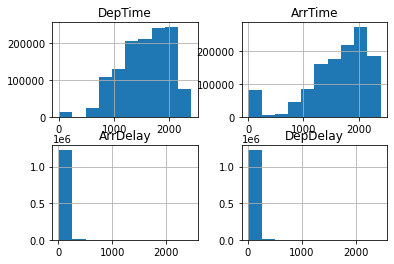

In [18]:
numerics.hist()

array([[<AxesSubplot:title={'center':'DepTime'}>,
        <AxesSubplot:title={'center':'ArrTime'}>],
       [<AxesSubplot:title={'center':'ArrDelay'}>,
        <AxesSubplot:title={'center':'DepDelay'}>]], dtype=object)

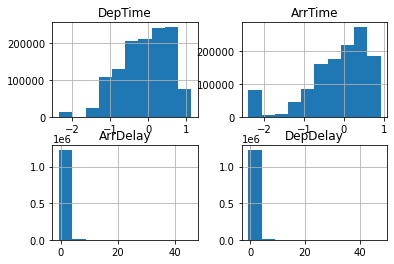

In [19]:
numericsRobustDS.hist()

## NIVELL 3


### Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [20]:
delayedFlightsDummies.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM,N
count,1.247486e+06,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,...,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1247486.0
mean,3.319515e+06,2008.0,6.065399e+00,1.572542e+01,3.980082e+00,1.558832e+03,1.487949e+03,1.616749e+03,1.652458e+03,2.276526e+03,...,2.173171e-03,1.635289e-04,1.159131e-03,1.338692e-04,1.282580e-05,2.357541e-03,1.555128e-04,2.164353e-05,3.535110e-04,1.0
std,2.079531e+06,0.0,3.508937e+00,8.793008e+00,1.993270e+00,4.543300e+02,4.211782e+02,5.839416e+02,4.617372e+02,1.997547e+03,...,4.656662e-02,1.278680e-02,3.402629e-02,1.156942e-02,3.581290e-03,4.849727e-02,1.246951e-02,4.652212e-03,1.879857e-02,0.0
min,4.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,1.484624e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.232000e+03,1.150000e+03,1.326000e+03,1.340000e+03,6.370000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,3.224052e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.618000e+03,1.529000e+03,1.737000e+03,1.722000e+03,1.589000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
75%,4.921396e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.924000e+03,1.830000e+03,2.048000e+03,2.022000e+03,3.676000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
max,7.009718e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0


In [21]:
delayedFlightsDummies.dtypes

Unnamed: 0    int64
Year          int64
Month         int64
DayofMonth    int64
DayOfWeek     int64
              ...  
XNA           uint8
YAK           uint8
YKM           uint8
YUM           uint8
N             uint8
Length: 654, dtype: object

array([[<AxesSubplot:title={'center':'ArrDelay'}>,
        <AxesSubplot:title={'center':'DepDelay'}>]], dtype=object)

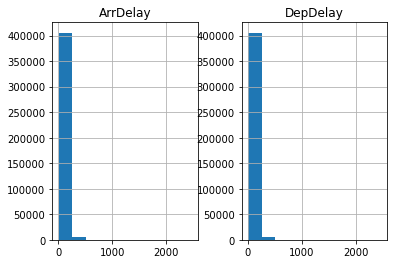

In [22]:
y_test.hist()

array([[<AxesSubplot:title={'center':'ArrDelay'}>,
        <AxesSubplot:title={'center':'DepDelay'}>]], dtype=object)

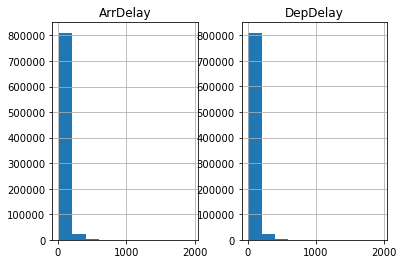

In [23]:
y_train.hist()

array([[<AxesSubplot:title={'center':'DepTime'}>,
        <AxesSubplot:title={'center':'ArrTime'}>]], dtype=object)

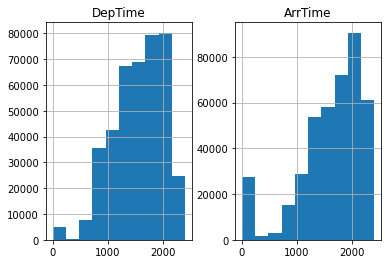

In [24]:
X_test.hist()

array([[<AxesSubplot:title={'center':'DepTime'}>,
        <AxesSubplot:title={'center':'ArrTime'}>]], dtype=object)

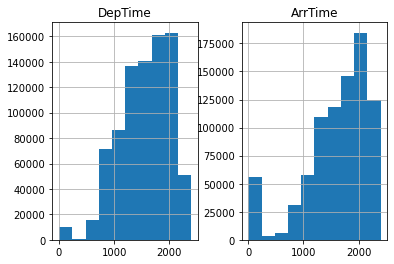

In [25]:
X_train.hist()